**Entrega #1 - Series de tiempo**
En esta entrega se analiza el data set [Microsoft Stock](https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis?resource=download), el cual contiene información desde el 1ro de abril de 2015 a 1ro de abril de 2021. Los datos fueron recolectados a través de <GOOGLEFINANCE>. 

Como primer paso, se cargan las librerías necesarias para el análisis y visualización de los datos:

In [34]:
#librerias
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Se cargan los datos con la libreria de <pandas>:

In [35]:
#cargar los datos
data = pd.read_csv("Microsoft_Stock.csv")
#quitar la hora y solo dejar la fecha
data['Date'] = pd.to_datetime(data.Date).dt.date

print(data.head(10))

         Date   Open   High    Low  Close    Volume
0  2015-04-01  40.60  40.76  40.31  40.72  36865322
1  2015-04-02  40.66  40.74  40.12  40.29  37487476
2  2015-04-06  40.34  41.78  40.18  41.55  39223692
3  2015-04-07  41.61  41.91  41.31  41.53  28809375
4  2015-04-08  41.48  41.69  41.04  41.42  24753438
5  2015-04-09  41.25  41.62  41.25  41.48  25723861
6  2015-04-10  41.63  41.95  41.41  41.72  28022002
7  2015-04-13  41.40  42.06  41.39  41.76  30276692
8  2015-04-14  41.80  42.03  41.39  41.65  24244382
9  2015-04-15  41.76  42.46  41.68  42.26  27343581


Se procede a visualizar la serie de tiempo, teniendo en cuenta la variable de volumen. Se toma la fecha como índice para tener una vista más clara. 

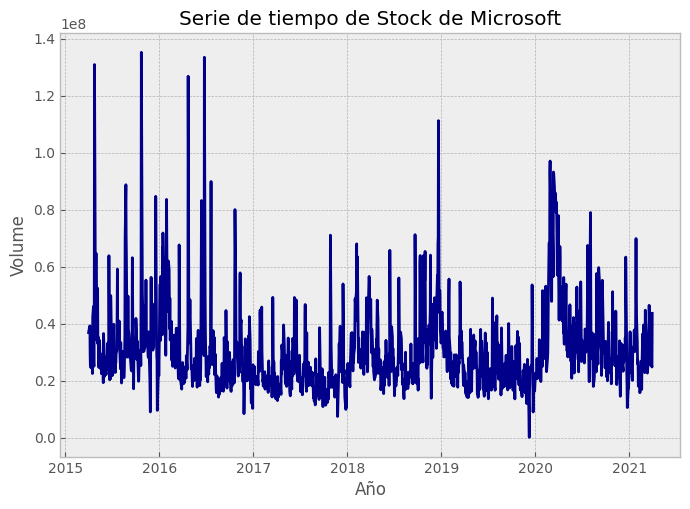

In [36]:
#hacer que las fechas salgan en el eje x
data.set_index('Date', inplace = True)
data.sort_values('Date', inplace=True)

#graficar la serie de tiempo
plt.figure(figsize=(8, 5.5))
data['Volume'].plot(color='darkblue')

#layout del grafico
plt.xlabel('Año')
plt.ylabel('Volume')
plt.title('Serie de tiempo de Stock de Microsoft')
plt.style.use('bmh')

**Anotaciones iniciales:**
* Los picos muestran cambios abruptos en el volumen que se pueden deber a noticias o eventos externos que afectaron el comportamiento de los inversores. 
* Los periodos que se pueden destacar son de 2015 a 2016 donde hubo la mayor volatibilidad, además del periodo de 2019 a 2020 en donde hubo un gran aumento del volumen. 
* No parece haber un patrón estacional claro, ya que los picos no ocurren de manera regular a lo largo del tiempo. Sin embargo, podrías realizar un análisis más profundo, como descomposición de la serie en sus componentes (tendencia, estacionalidad y residuo), para confirmar si hay algún patrón cíclico o estacional.

In [39]:
#se verifica que no haya datos faltantes
missing = pd.isnull(data['Volume'])
print('Number of missing values found:', missing.sum())

Number of missing values found: 0


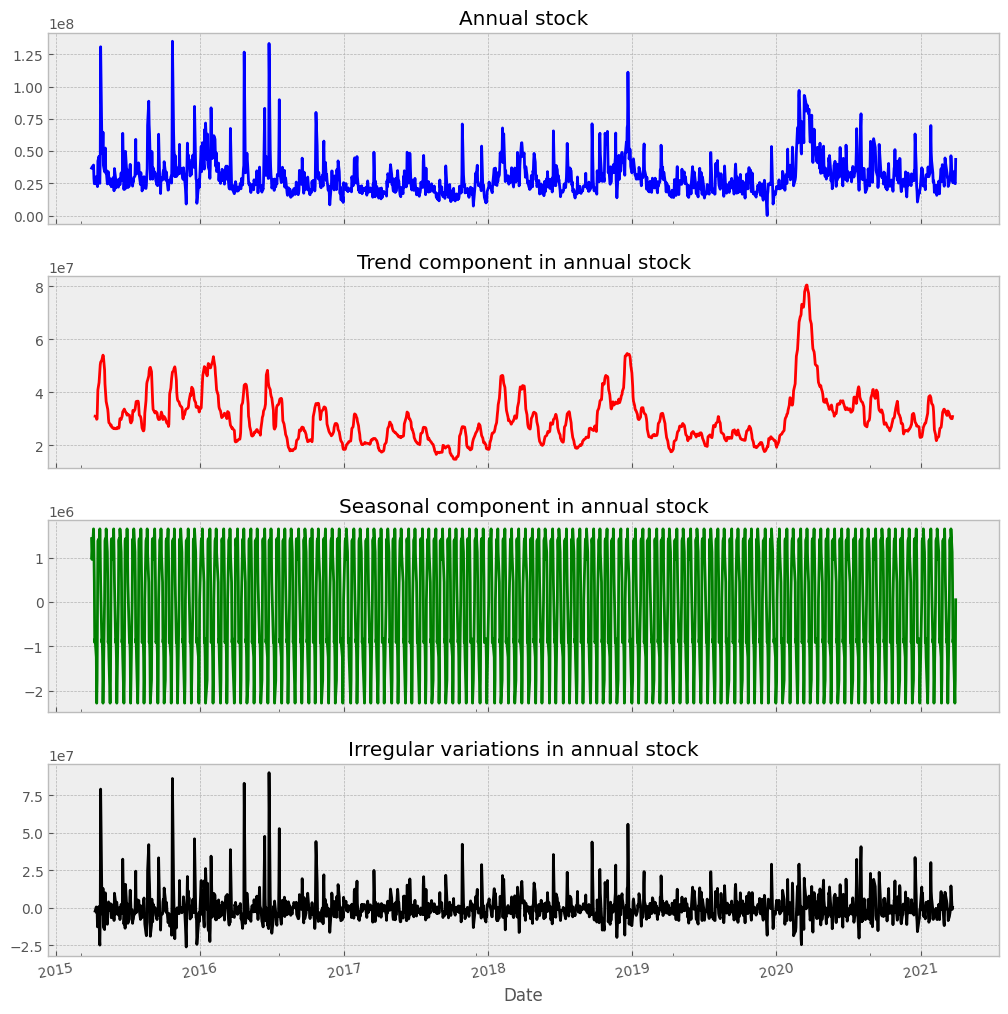

In [48]:
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

decompose_model = seasonal.seasonal_decompose(data.Volume.tolist(), period=12, model='additive')

fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10, 10)

data['Volume'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Annual stock')

pd.Series(data=decompose_model.trend, index=data.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in annual stock')

pd.Series(data=decompose_model.seasonal, index=data.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in annual stock')

pd.Series(data=decompose_model.resid, index=data.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in annual stock')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0);
plt.xticks(rotation=10);